In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from sklearn.neighbors import NearestNeighbors

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 450

Set parameters

In [2]:
neighbors = 15

cell_cycle_genes = [x.strip() for x in open("/home/levinsj/Fetal_dir/Analysis/referenceFiles/cellCycleGenes.txt")]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

load model 2

In [3]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/project_Files/Fetal/model2/fetal_PostSCANVI_imputedExpression.h5ad")


In [4]:
print(adata)

AnnData object with n_obs × n_vars = 377959 × 24485
    obs: 'sample', 'phase', 'type', 'cellType', 'cellType3', 'tech', 'cellType_CosMx_1', 'leiden', 'fov', 'cell_ID', 'pct_counts_mt', 'pct_nuc', 'total_counts', 'nCount_RNA', 'n_genes_by_counts', 'CenterX_global_px', 'CenterY_global_px', 'Area', 'Count_percentile', 'Mean.DAPI', 'Max.DAPI', 'G2M_score', 'S_score', 'gAge', 'AllCounts', '_scvi_batch', '_scvi_labels', 'mean_distance', 'worst_pct', 'cellType_SCANVI', 'leiden_sub18', 'neighbors', 'Endothelium_neighbor', 'UB_CT_neighbor', 'Stroma_neighbor', 'Podocyte_neighbor', 'PT_neighbor', 'PEC_neighbor', 'LOH_neighbor', 'Int_neighbor', 'DCT_neighbor', 'Immune Cells_neighbor', 'Ureth_neighbor', 'DCT_absorbtion_SCVI', 'LOH_absorbtion_SCVI', 'PT_absorbtion_SCVI', 'Podo_absorbtion_SCVI', 'NPC_SCVI', 'Differentiated Cell_SCVI', 'Tubule_SCVI', 'Glomerular_SCVI', 'LatentTime_SCVI', 'PseudoTime_SCVI'
    uns: 'phase_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scANVI', 'X_scVI', 'X_umap', '_sc

In [5]:
threshold = 0.5

adata.obs['cellType_SCANVI'] = adata.obs['cellType_SCANVI'].astype(str)

# Filter the cells based on the 'cell_annotations' column and the 'absorption_prob_glom' column
# and split the 'cell_annotations' accordingly
adata.obs.loc[(adata.obs['cellType_SCANVI'] == "PT") & (adata.obs['Glomerular_SCVI'] > threshold), 'cellType_SCANVI'] = 'PT_glom'
adata.obs.loc[(adata.obs['cellType_SCANVI'] == "PT") & (adata.obs['Glomerular_SCVI'] <= threshold), 'cellType_SCANVI'] = 'PT_tubule'

In [6]:
adataSP = adata[adata.obs['tech'] == 'CosMx']

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


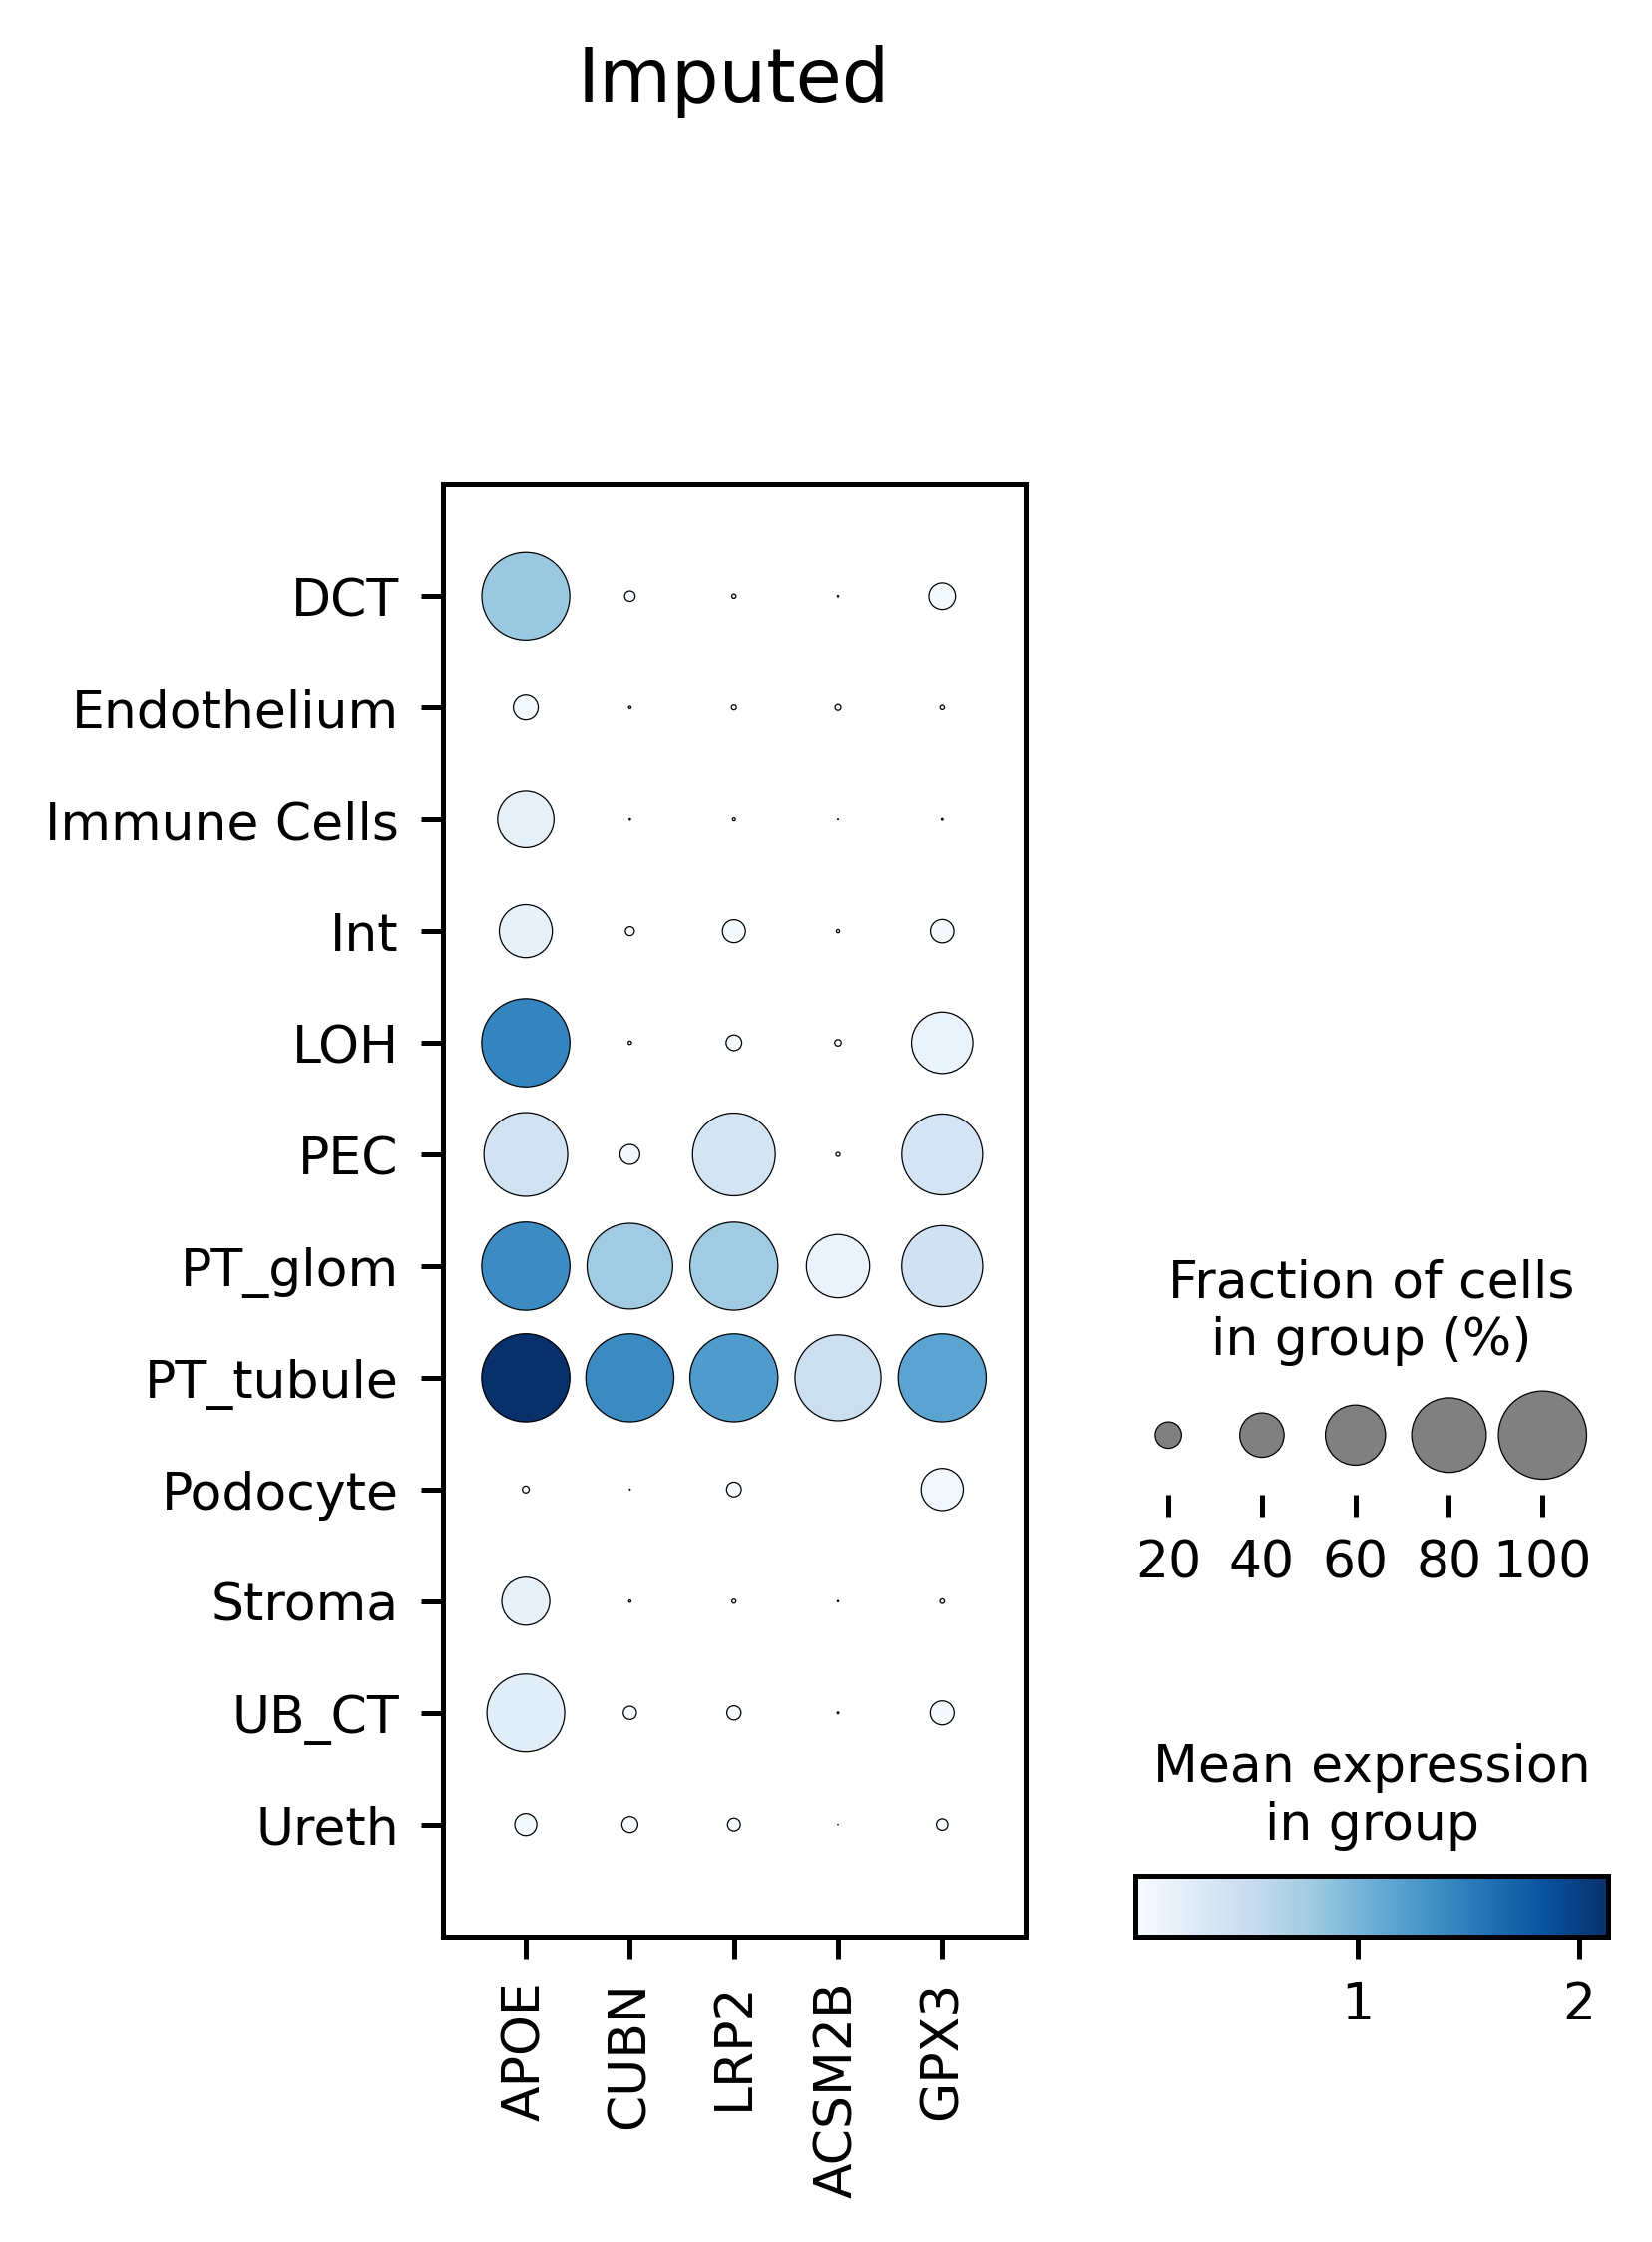

In [7]:
markers = ['APOE', 'CUBN','LRP2','ACSM2B','GPX3']

sc.pl.dotplot(adataSP,markers, groupby='cellType_SCANVI', title = "Imputed", color_map="Blues", log = True, layer = "SCVI_imputed")


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


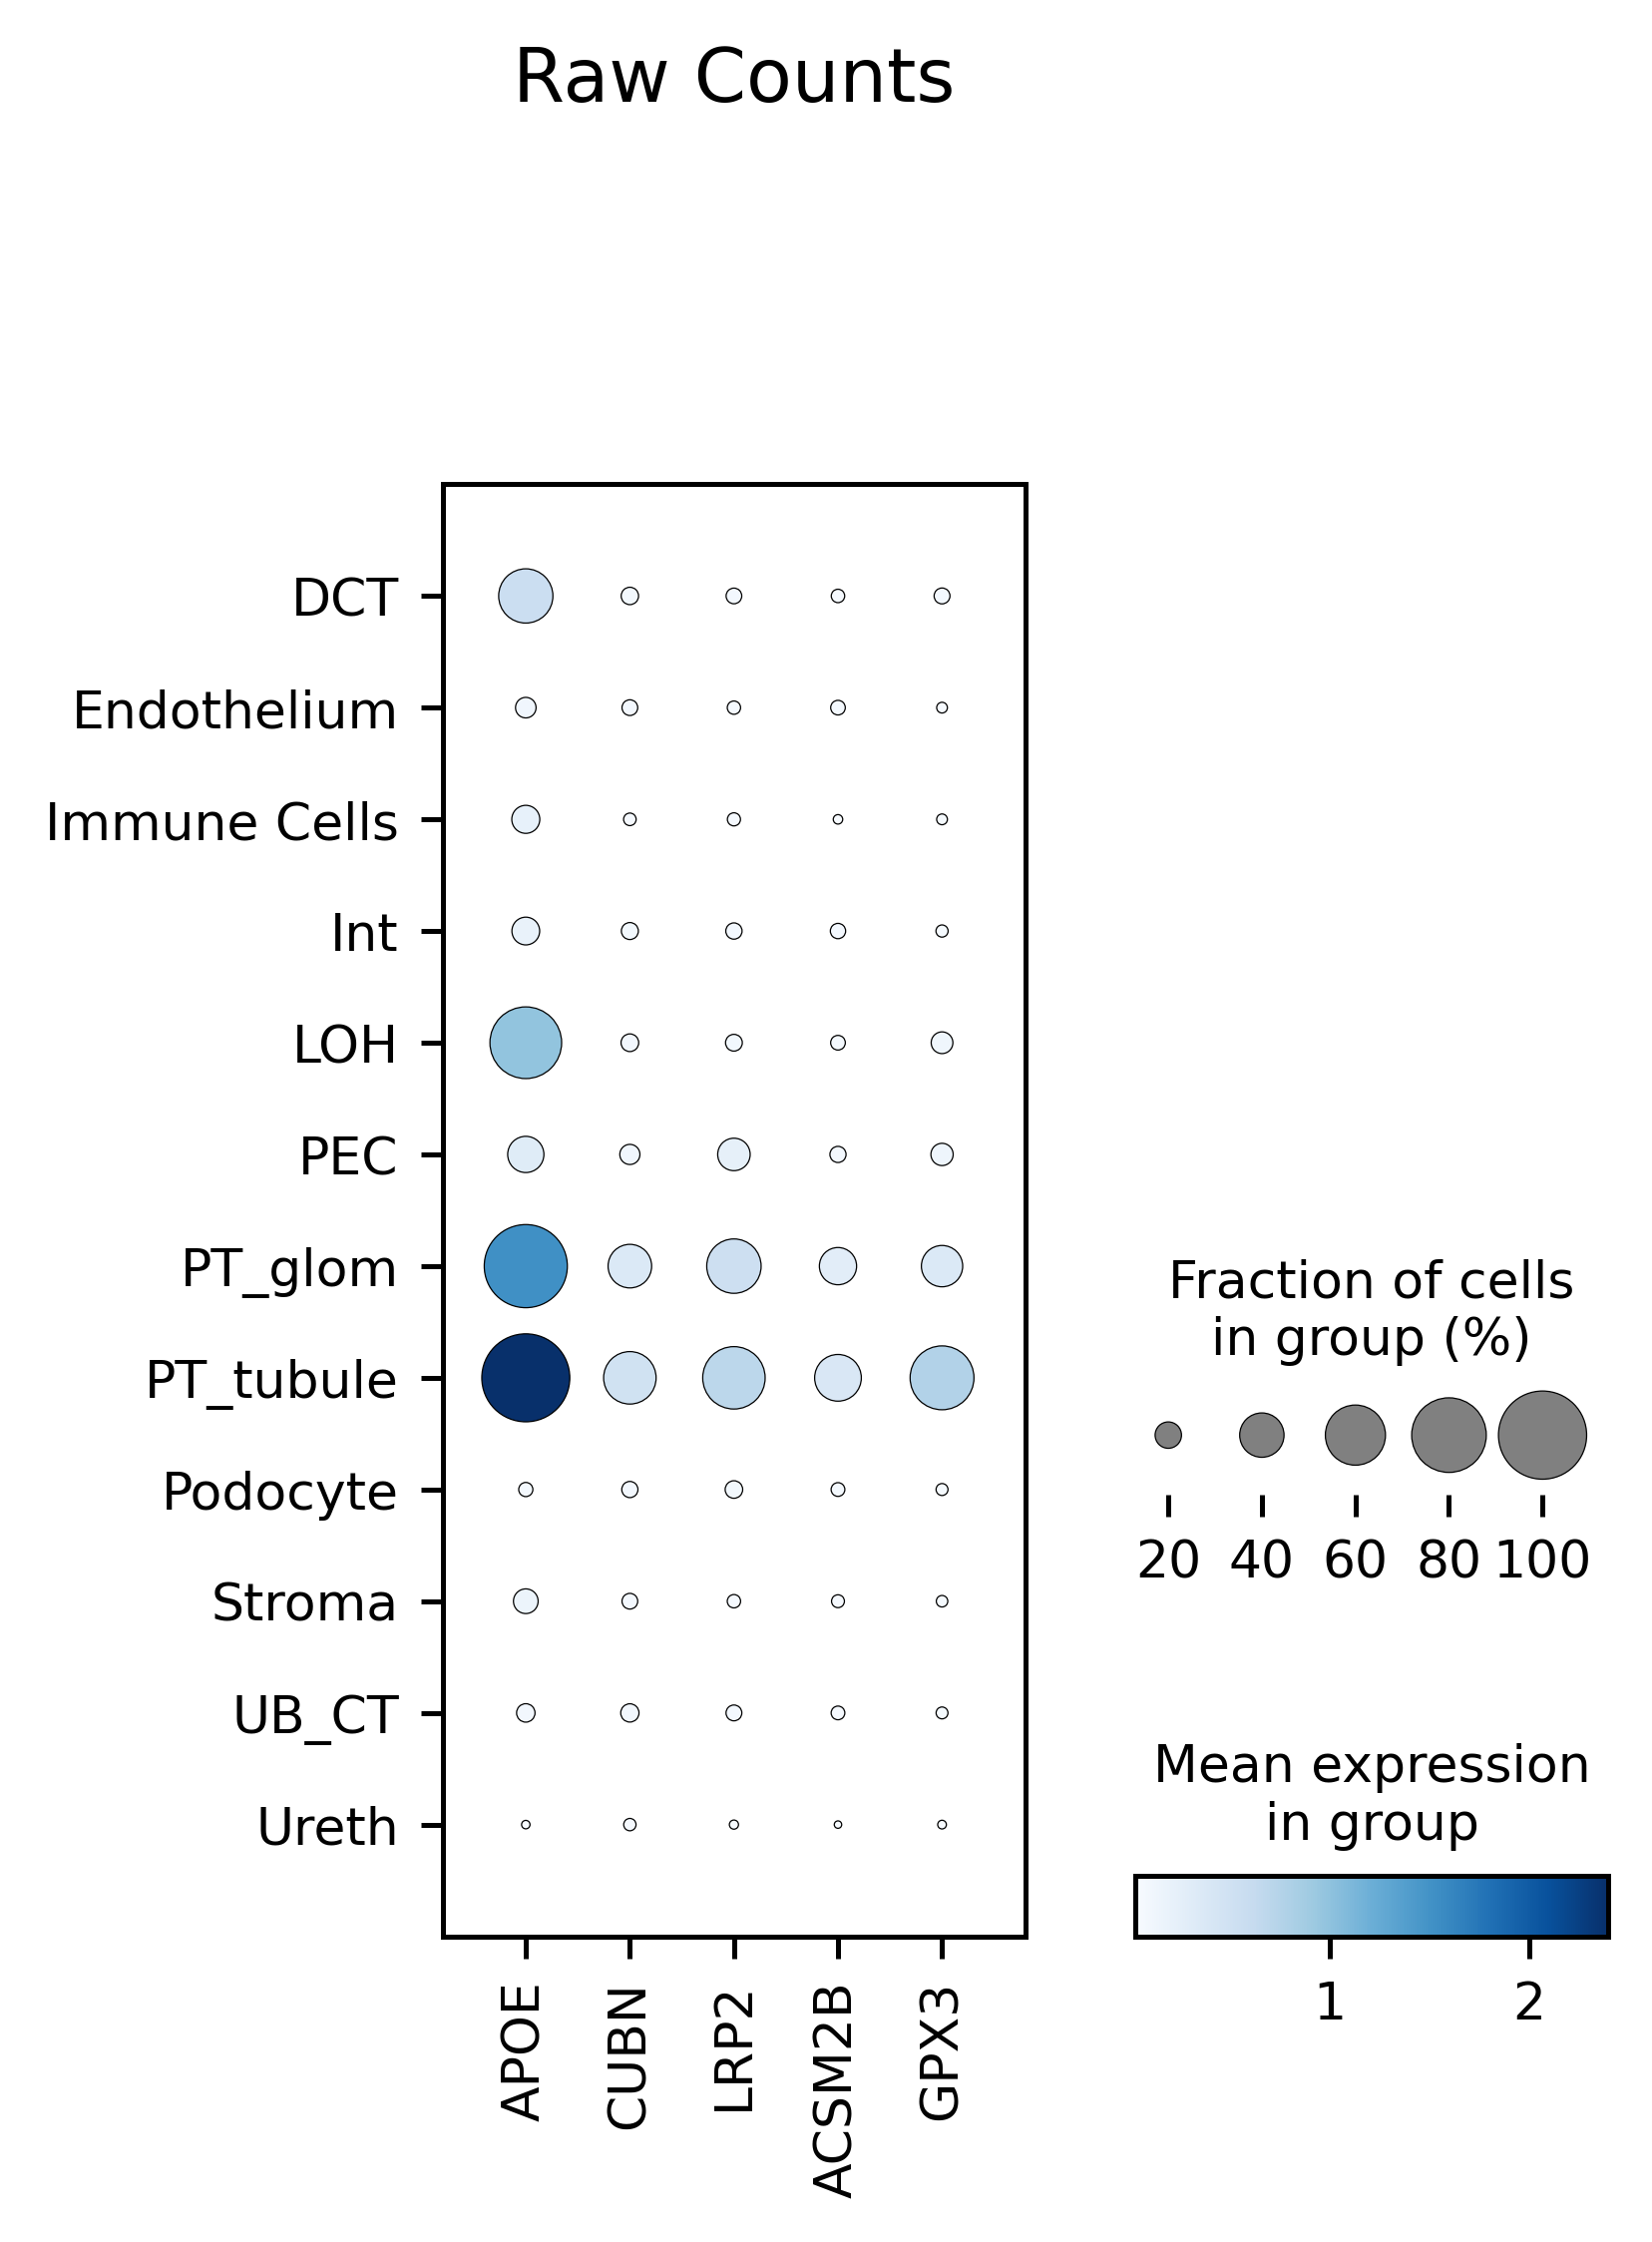

In [8]:
markers = ['APOE', 'CUBN','LRP2','ACSM2B','GPX3']

sc.pl.dotplot(adataSP,markers, groupby='cellType_SCANVI', title = "Raw Counts", color_map="Blues", log = True, layer = "counts")
